In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', None)


# To supress warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("2.0 df_KNN_imputed.csv")
df.head()

ID  Overall_Experience       Seat_Comfort Seat_Class  \
0  98800001                   0  Needs Improvement  Green Car   
1  98800002                   0               Poor   Ordinary   
2  98800003                   1  Needs Improvement  Green Car   
3  98800004                   0         Acceptable   Ordinary   
4  98800005                   1         Acceptable   Ordinary   

  Arrival_Time_Convenient           Catering  Platform_Location  \
0               Excellent          Excellent    Very Convenient   
1               Excellent               Poor  Needs Improvement   
2       Needs Improvement  Needs Improvement  Needs Improvement   
3       Needs Improvement         Acceptable  Needs Improvement   
4              Acceptable         Acceptable         Manageable   

  Onboard_Wifi_Service Onboard_Entertainment Online_Support  \
0                 Good     Needs Improvement     Acceptable   
1                 Good                  Poor           Good   
2    Needs Improvement                  Good      Excellent   
3           Acceptable     Needs Improvement     Acceptable   
4    Needs Improvement                  Good      Excellent   

  Ease_of_Online_Booking    Onboard_Service            Legroom  \
0      Needs Improvement  Needs Improvement         Acceptable   
1                   Good          Excellent  Needs Improvement   
2              Excellent          Excellent          Excellent   
3             Acceptable         Acceptable         Acceptable   
4                   Good               Good               Good   

    Baggage_Handling    CheckIn_Service        Cleanliness Online_Boarding  \
0  Needs Improvement               Good  Needs Improvement            Poor   
1               Poor  Needs Improvement               Good            Good   
2          Excellent               Good          Excellent       Excellent   
3         Acceptable               Good         Acceptable      Acceptable   
4               Good               Good               Good            Good   

   Gender   Customer_Type   Age      Type_Travel Travel_Class  \
0  Female  Loyal Customer  52.0  Business Travel     Business   
1    Male  Loyal Customer  48.0  Personal Travel          Eco   
2  Female  Loyal Customer  43.0  Business Travel     Business   
3  Female  Loyal Customer  44.0  Business Travel     Business   
4  Female  Loyal Customer  50.0  Business Travel     Business   

   Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  
0              272                      0.0                    5.0  
1             2200                      9.0                    0.0  
2             1061                     77.0                  119.0  
3              780                     13.0                   18.0  
4             1981                      0.0                    0.0

In [7]:
df_submit = pd.read_csv("2.0 df_submit_KNN_imputed.csv")

In [8]:
survey_cols = df.columns[1:16].tolist()
info_cols = df.columns[16:].tolist()

In [9]:
df['Platform_Location'].replace(['Very Convenient', 'Convenient', 'Manageable', 'Needs Improvement', 'Inconvenient','Very Inconvenient'],
                                ['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'],
                               inplace = True
                               )

In [10]:
df_submit['Platform_Location'].replace(['Very Convenient', 'Convenient', 'Manageable', 'Needs Improvement', 'Inconvenient','Very Inconvenient'],
                                ['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'],
                               inplace = True
                               )

In [11]:
order1 = ['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor']
order1.reverse()

### Univariate

**Categorical**

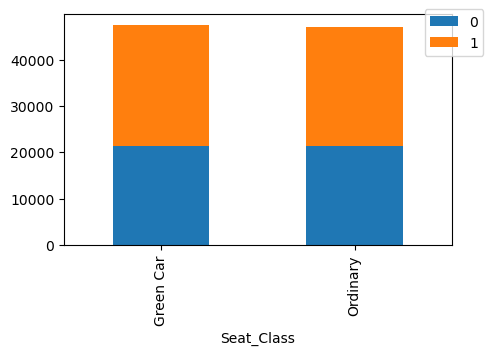

In [12]:
pd.crosstab(df['Seat_Class'],df['Overall_Experience']).plot(kind='bar',stacked=True,figsize=(5,3))
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

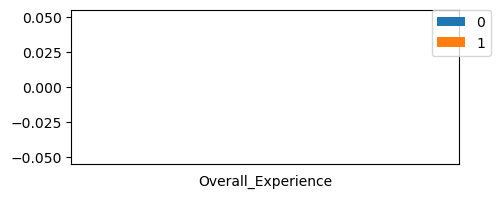

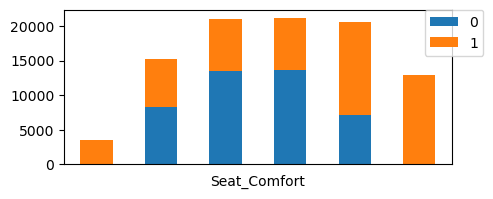

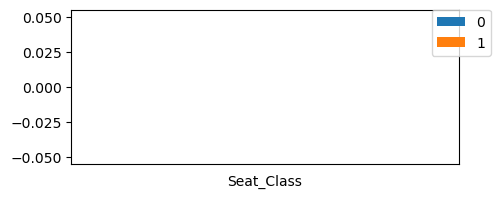

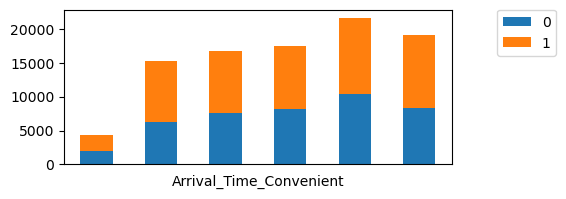

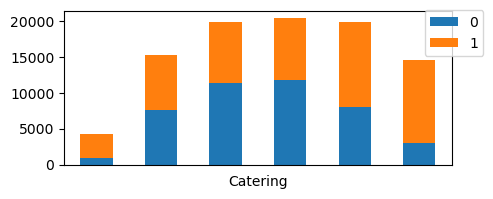

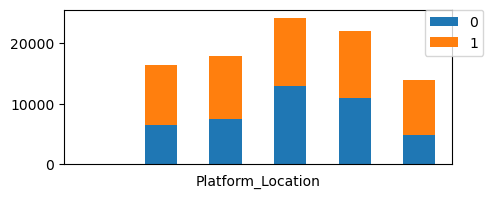

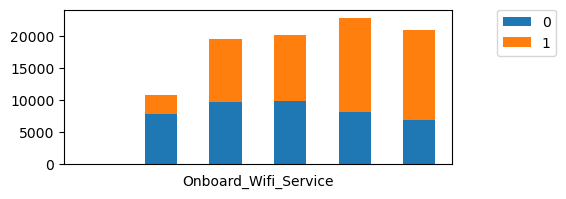

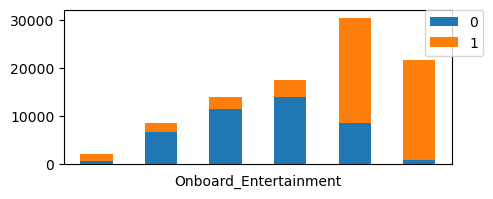

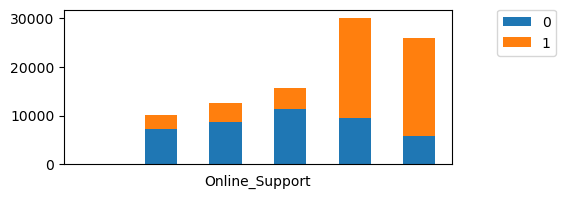

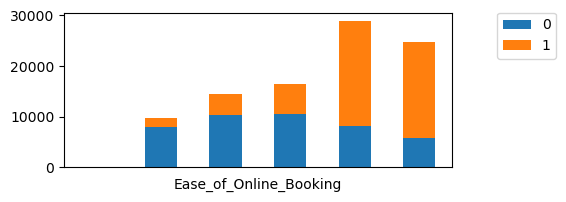

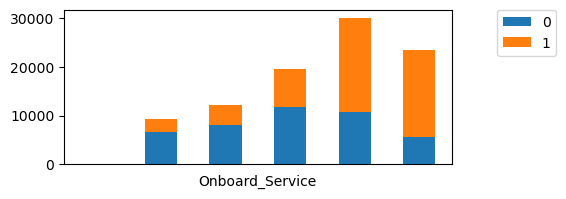

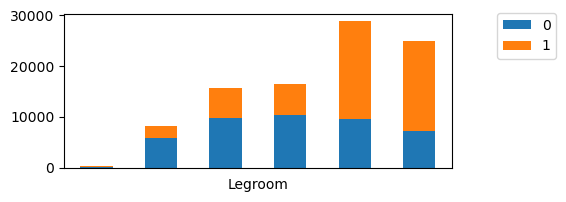

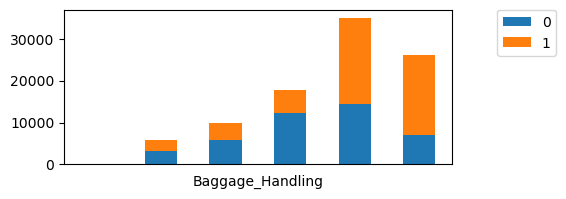

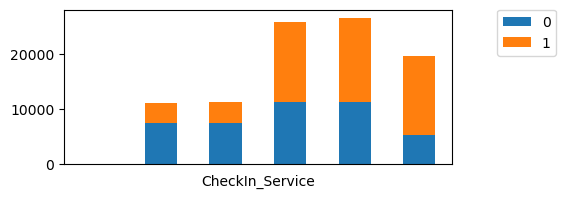

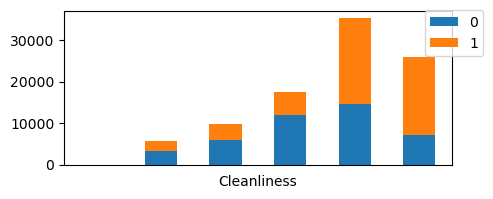

In [13]:
for col in survey_cols:
    pd.crosstab(df[col],df['Overall_Experience']).reindex(order1).plot(kind='bar',stacked=True,figsize=(5,2))
    plt.xticks([])
    plt.legend(bbox_to_anchor=(1.1, 1.05))

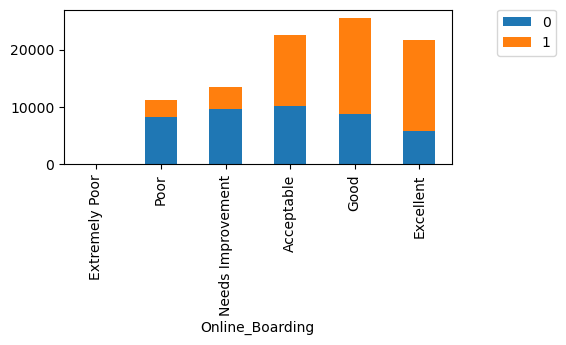

In [14]:
pd.crosstab(df[info_cols[0]],df['Overall_Experience']).reindex(order1).plot(kind='bar',stacked=True,figsize=(5,2))
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

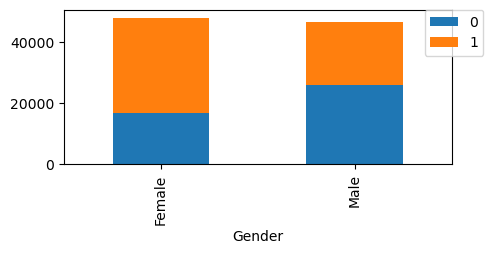

In [15]:
pd.crosstab(df[info_cols[1]],df['Overall_Experience']).plot(kind='bar',stacked=True,figsize=(5,2))
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

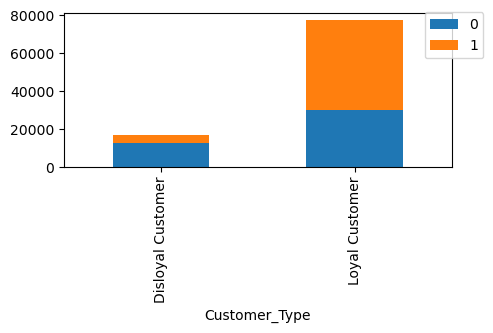

In [16]:
pd.crosstab(df[info_cols[2]],df['Overall_Experience']).plot(kind='bar',stacked=True,figsize=(5,2))
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

### REWORK AGE BIN DISTRIBUTION

In [17]:
count, bin_edges = np.histogram(df['Age'],9)


In [18]:
df['Age'].max()

85.0

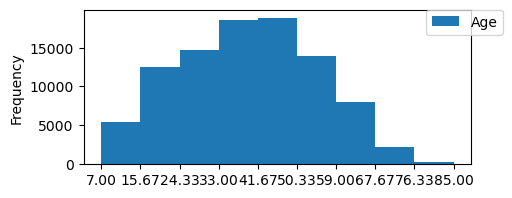

In [19]:
df[info_cols[3]].plot(kind='hist',
                                                            stacked=True,
                                                            figsize=(5,2),
                                                            bins = 9,
                                                            xticks = bin_edges
                                                           )
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

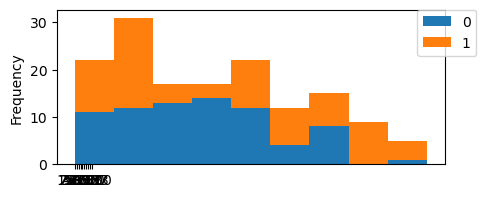

In [20]:
pd.crosstab(df[info_cols[3]],df['Overall_Experience']).plot(kind='hist',
                                                            stacked=True,
                                                            figsize=(5,2),
                                                            bins = 9,
                                                            xticks = bin_edges
                                                           )
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

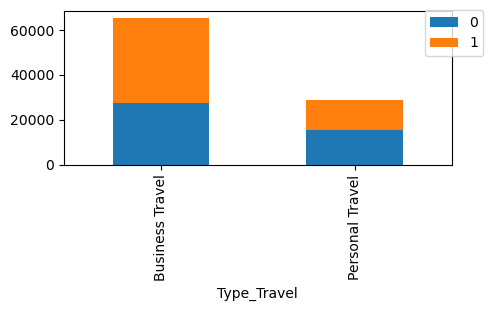

In [21]:
pd.crosstab(df[info_cols[4]],df['Overall_Experience']).plot(kind='bar',stacked=True,figsize=(5,2))
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

### **Numerical**

In [22]:
def numerical_chart(feature):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(df[feature], ax=ax_box)
    sns.distplot(df[feature], ax=ax_hist)
    ax_box.set(xlabel=feature)
    plt.show()

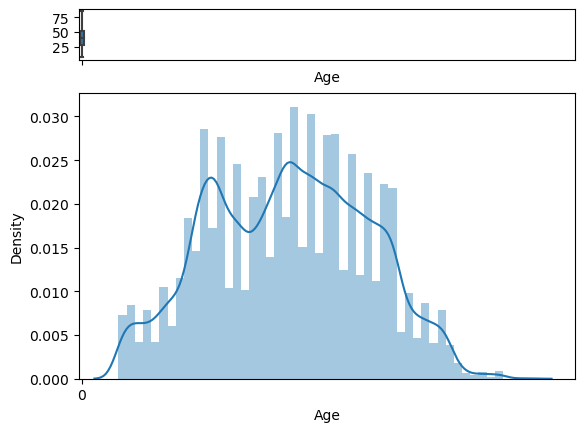

In [23]:
numerical_chart('Age')

Age distribution is good

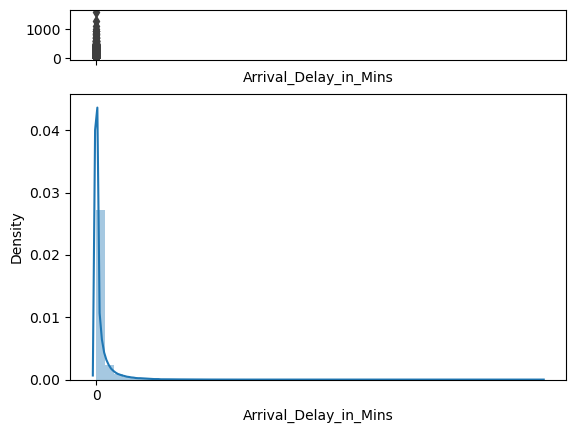

In [24]:
numerical_chart('Arrival_Delay_in_Mins')

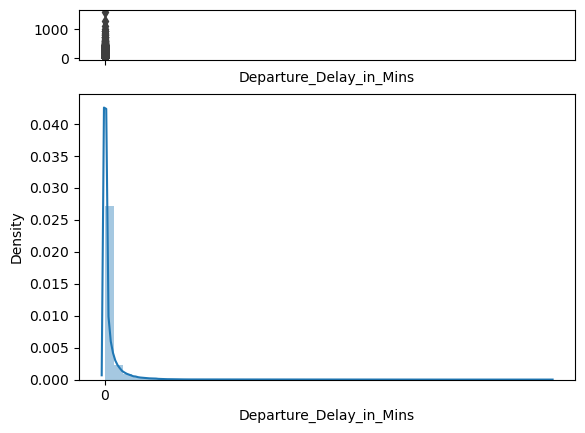

In [25]:
numerical_chart('Departure_Delay_in_Mins')

Arrival and departure delay is extremely right skew, may need to be dropped

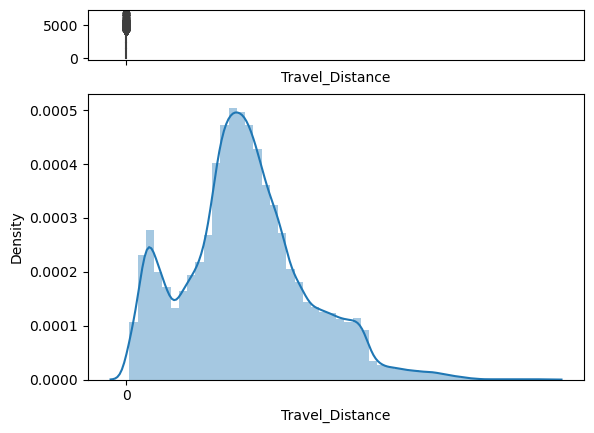

In [26]:
numerical_chart('Travel_Distance')

In [27]:
df['Overall_Experience']==0

0         True
1         True
2        False
3         True
4        False
         ...  
94374     True
94375    False
94376    False
94377     True
94378     True
Name: Overall_Experience, Length: 94379, dtype: bool

There are outliers need taking care of.

In [28]:
Q1 = df['Travel_Distance'].quantile(0.25)  
Q3 = df['Travel_Distance'].quantile(0.75)
IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)
lower = (Q1 - 1.5 * IQR)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

In [29]:
df[df['Overall_Experience']==0]['Travel_Distance']

0         272
1        2200
3         780
6        2029
7         853
         ... 
94371     502
94373    1534
94374    1357
94377    2744
94378    2107
Name: Travel_Distance, Length: 42786, dtype: int64

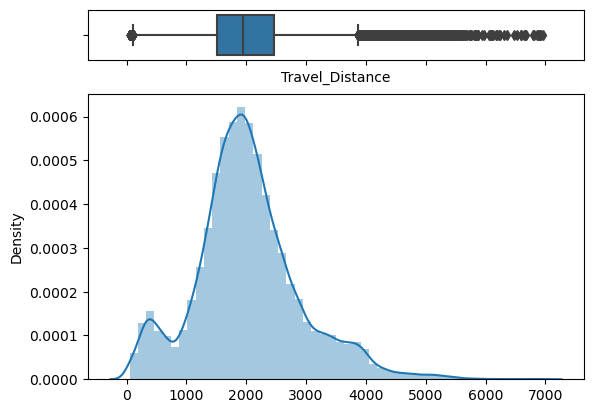

In [34]:
chart = df[df['Overall_Experience']==0]['Travel_Distance']
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(x=chart, ax=ax_box)
sns.distplot(x=chart, ax=ax_hist)
#ax_box.set(xlabel=chart)
plt.show()

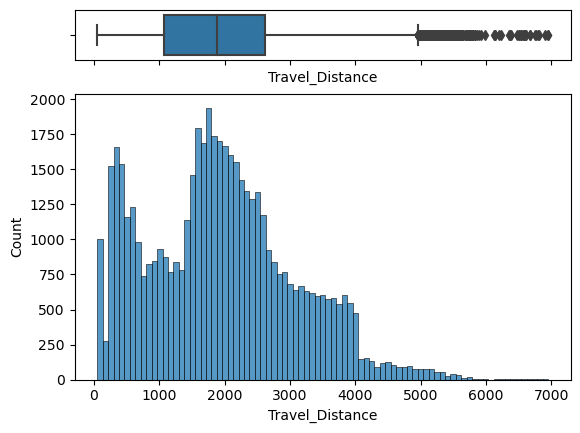

In [35]:
chart = df[df['Overall_Experience']==1]['Travel_Distance']
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(x=chart, ax=ax_box)
sns.histplot(x=chart, ax=ax_hist)
#ax_box.set(xlabel=chart)
plt.show()

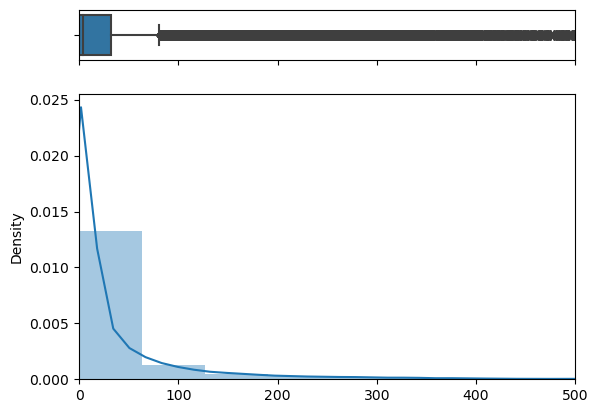

In [36]:
chart = df[df['Overall_Experience']==0]['Departure_Delay_in_Mins'] + df[df['Overall_Experience']==0]['Arrival_Delay_in_Mins']
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(x=chart, ax=ax_box)
sns.distplot(x=chart, ax=ax_hist)
#ax_box.set(xlabel=chart)
plt.xlim(0,500)
plt.show()

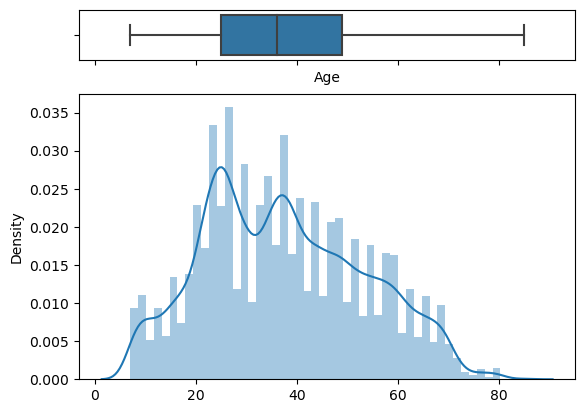

In [38]:
chart = df[df['Overall_Experience']==0]['Age']
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(x=chart, ax=ax_box)
sns.distplot(x=chart, ax=ax_hist)
plt.show()

In [39]:
df[(df['Departure_Delay_in_Mins']<600) & (df['Arrival_Delay_in_Mins']<600)]

ID  Overall_Experience       Seat_Comfort Seat_Class  \
0      98800001                   0  Needs Improvement  Green Car   
1      98800002                   0               Poor   Ordinary   
2      98800003                   1  Needs Improvement  Green Car   
3      98800004                   0         Acceptable   Ordinary   
4      98800005                   1         Acceptable   Ordinary   
...         ...                 ...                ...        ...   
94374  98894375                   0               Poor   Ordinary   
94375  98894376                   1               Good   Ordinary   
94376  98894377                   1  Needs Improvement  Green Car   
94377  98894378                   0  Needs Improvement   Ordinary   
94378  98894379                   0         Acceptable   Ordinary   

      Arrival_Time_Convenient           Catering  Platform_Location  \
0                   Excellent          Excellent          Excellent   
1                   Excellent               Poor  Needs Improvement   
2           Needs Improvement  Needs Improvement  Needs Improvement   
3           Needs Improvement         Acceptable  Needs Improvement   
4                  Acceptable         Acceptable         Acceptable   
...                       ...                ...                ...   
94374                    Good               Good               Good   
94375                    Good               Good               Good   
94376       Needs Improvement  Needs Improvement  Needs Improvement   
94377                    Good  Needs Improvement               Good   
94378                    Poor         Acceptable         Acceptable   

      Onboard_Wifi_Service Onboard_Entertainment Online_Support  \
0                     Good     Needs Improvement     Acceptable   
1                     Good                  Poor           Good   
2        Needs Improvement                  Good      Excellent   
3               Acceptable     Needs Improvement     Acceptable   
4        Needs Improvement                  Good      Excellent   
...                    ...                   ...            ...   
94374                 Poor                  Poor           Poor   
94375    Needs Improvement             Excellent      Excellent   
94376                 Good             Excellent           Good   
94377                 Good     Needs Improvement           Good   
94378           Acceptable            Acceptable     Acceptable   

      Ease_of_Online_Booking    Onboard_Service            Legroom  \
0          Needs Improvement  Needs Improvement         Acceptable   
1                       Good          Excellent  Needs Improvement   
2                  Excellent          Excellent          Excellent   
3                 Acceptable         Acceptable         Acceptable   
4                       Good               Good               Good   
...                      ...                ...                ...   
94374                   Poor               Good               Good   
94375             Acceptable         Acceptable         Acceptable   
94376                   Good               Good               Good   
94377                   Good         Acceptable               Good   
94378             Acceptable               Poor               Good   

        Baggage_Handling    CheckIn_Service        Cleanliness  \
0      Needs Improvement               Good  Needs Improvement   
1                   Poor  Needs Improvement               Good   
2              Excellent               Good          Excellent   
3             Acceptable               Good         Acceptable   
4                   Good               Good               Good   
...                  ...                ...                ...   
94374               Good  Needs Improvement               Good   
94375         Acceptable               Good         Acceptable   
94376               Good         Acceptable               Good   
94377               Good 

<AxesSubplot: xlabel='Departure_Delay_in_Mins', ylabel='Arrival_Delay_in_Mins'>

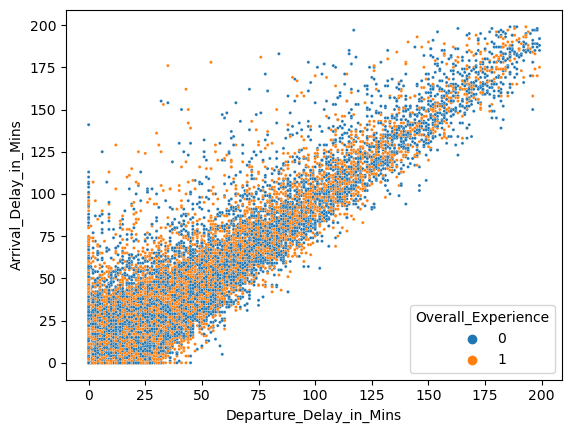

In [40]:
sns.scatterplot(data = df[(df['Departure_Delay_in_Mins']<200) & (df['Arrival_Delay_in_Mins']<200)],
                x='Departure_Delay_in_Mins', 
                y = 'Arrival_Delay_in_Mins', 
                hue = 'Overall_Experience',
                alpha = 1,
                s=5
               )

In [41]:
df['Overall_Experience'].value_counts()

1    51593
0    42786
Name: Overall_Experience, dtype: int64

### More EDA

In [42]:
df.drop(columns=['ID'],inplace=True)

In [43]:
df_submit.drop(columns=['ID'],inplace=True)

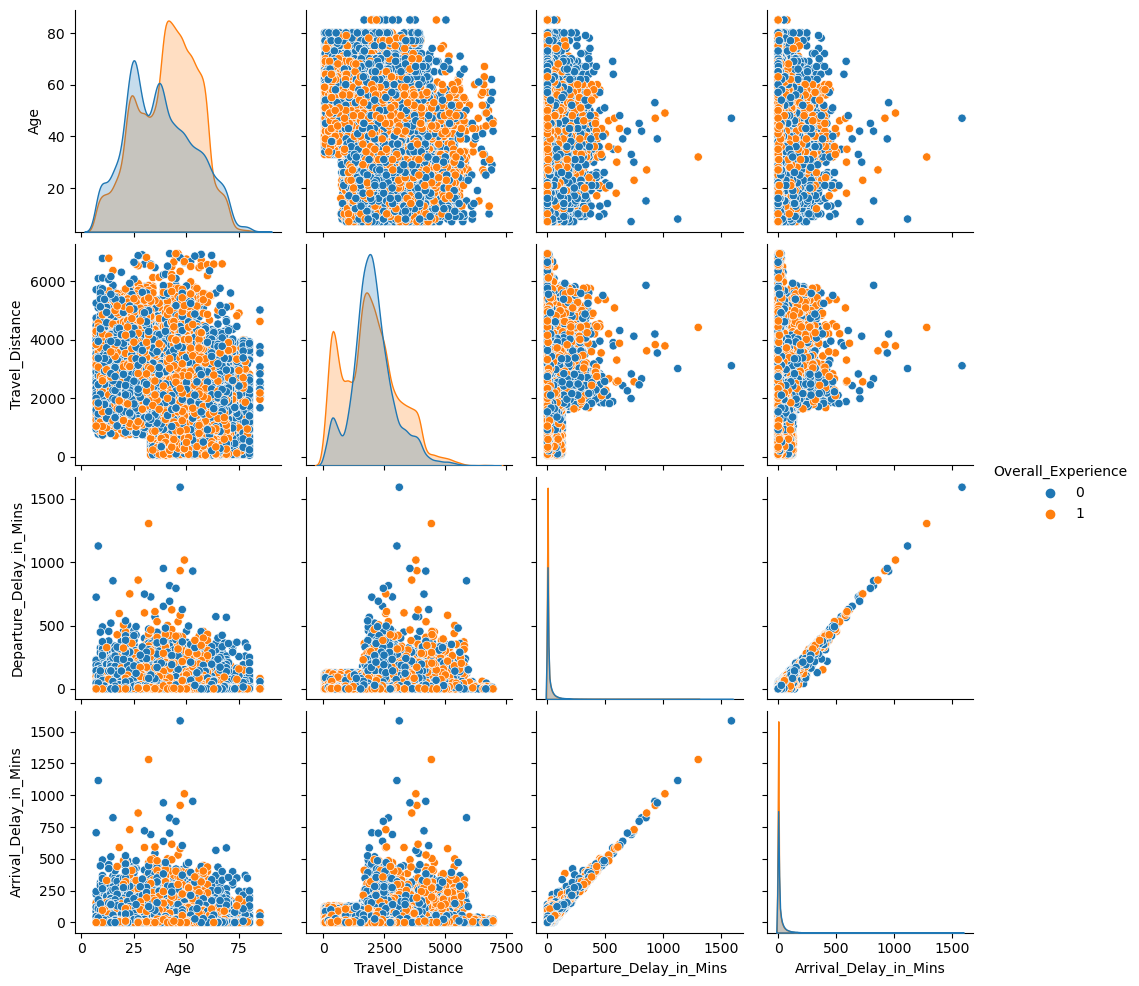

In [44]:
sns.pairplot(df, hue='Overall_Experience')

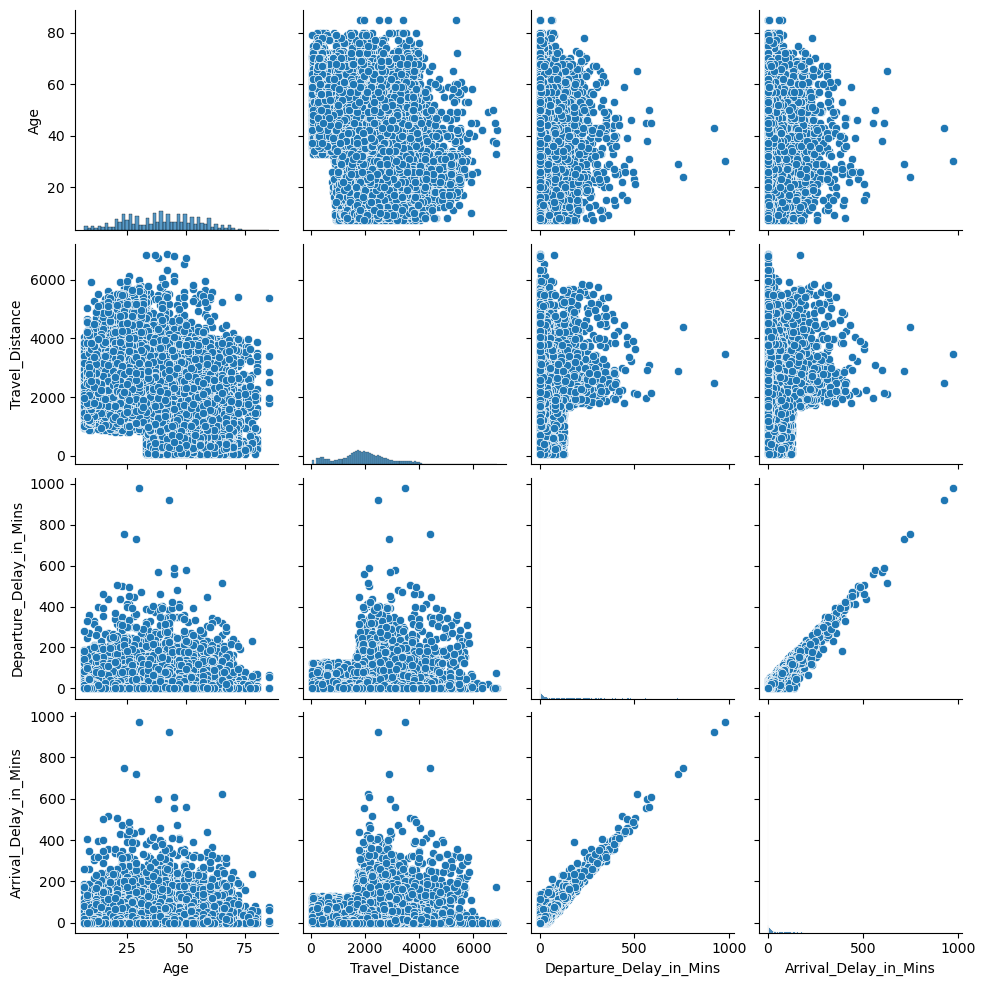

In [45]:
sns.pairplot(df_submit)

### Delays 

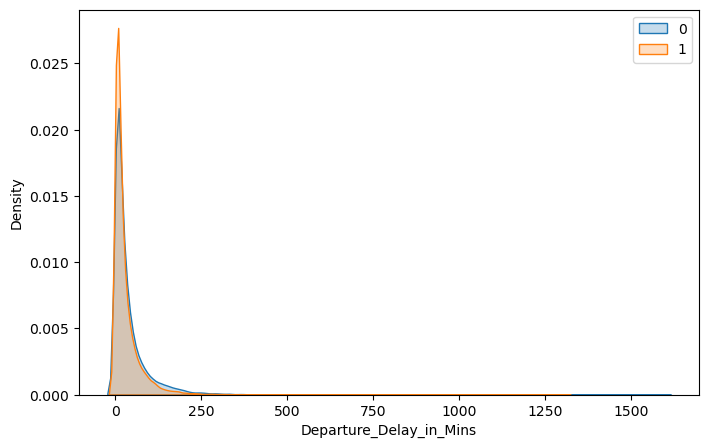

In [46]:
type_0 = df['Departure_Delay_in_Mins'][(df['Overall_Experience']==0) & (df['Departure_Delay_in_Mins'] != 0)] 
type_1 = df['Departure_Delay_in_Mins'][(df['Overall_Experience']==1) & (df['Departure_Delay_in_Mins'] != 0)]

plt.figure(figsize=(8, 5)) 
ax1 = sns.kdeplot(type_0, label='0', fill = True)  
ax2 = sns.kdeplot(type_1, label='1', fill = True, ax=ax1)  
ax1.legend()  
ax2.legend()

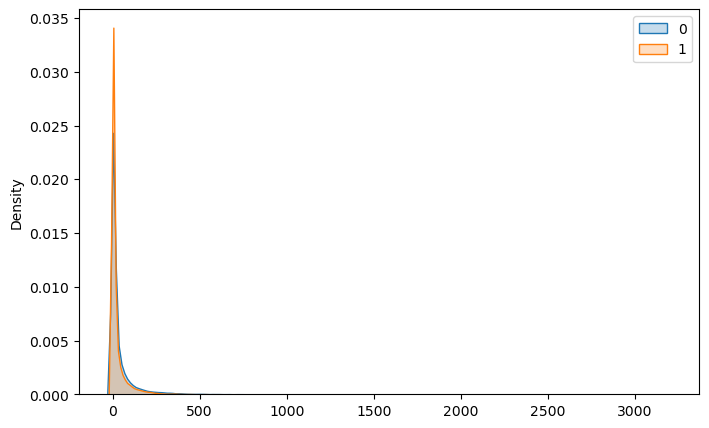

In [47]:
type_0 = (df['Arrival_Delay_in_Mins']+df['Departure_Delay_in_Mins'])[df['Overall_Experience']==0] 
type_1 = (df['Arrival_Delay_in_Mins']+df['Departure_Delay_in_Mins'])[df['Overall_Experience']==1] 

plt.figure(figsize=(8, 5)) 
ax1 = sns.kdeplot(type_0, label='0', fill = True)  
ax2 = sns.kdeplot(type_1, label='1', fill = True, ax=ax1)  
ax1.legend()  
ax2.legend()

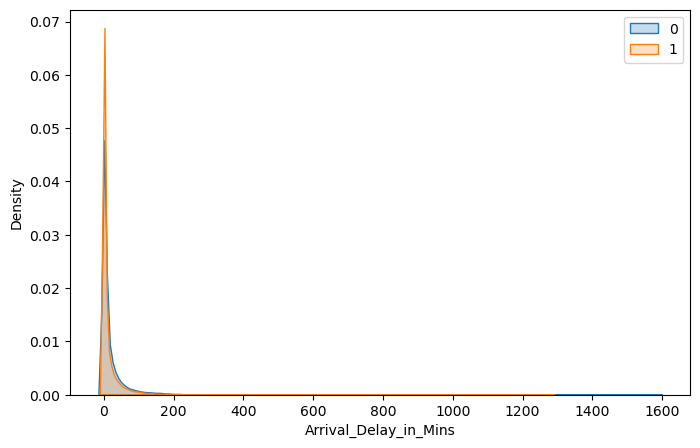

In [48]:
type_0 = df['Arrival_Delay_in_Mins'][df['Overall_Experience']==0] 
type_1 = df['Arrival_Delay_in_Mins'][df['Overall_Experience']==1]

plt.figure(figsize=(8, 5)) 
ax1 = sns.kdeplot(type_0, label='0', fill = True)  
ax2 = sns.kdeplot(type_1, label='1', fill = True, ax=ax1)  
ax1.legend()  
ax2.legend()

<AxesSubplot: xlabel='Age', ylabel='Arrival_Delay_in_Mins'>

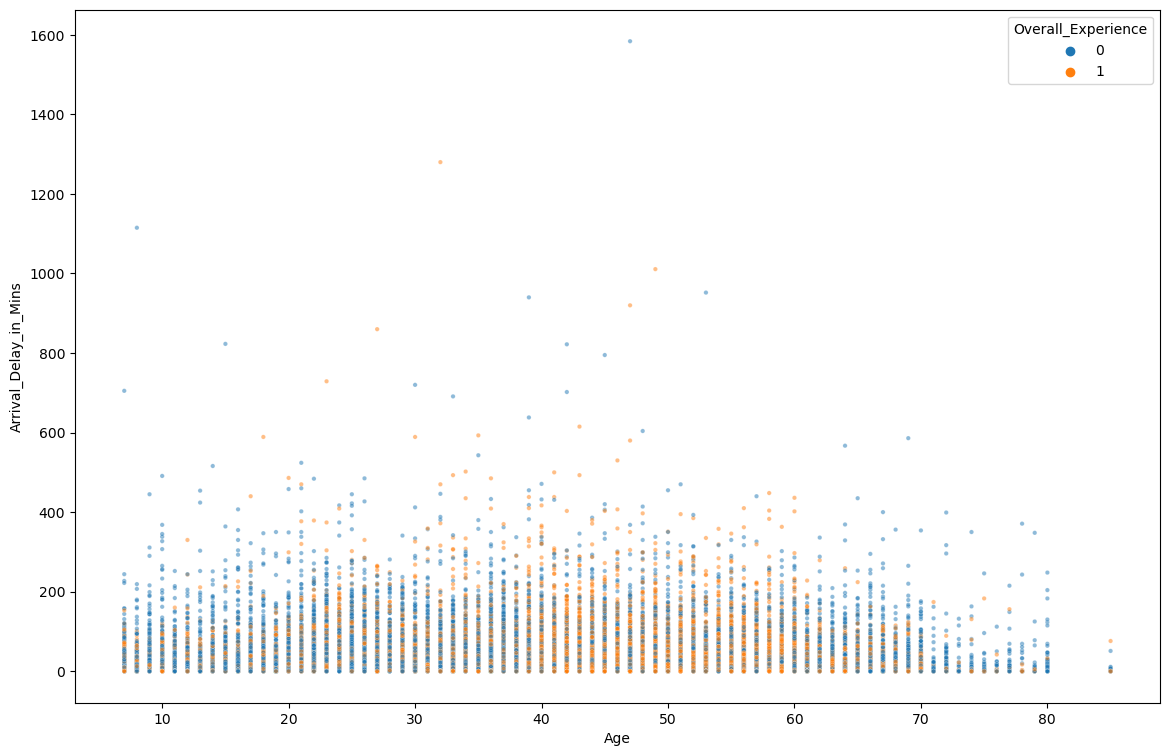

In [49]:
plt.figure(figsize=(14, 9)) 

sns.scatterplot(data = df,
                y='Arrival_Delay_in_Mins', 
                x = 'Age', 
                hue = 'Overall_Experience',
                alpha = 0.5,
                s=10
               )

(0.0, 500.0)

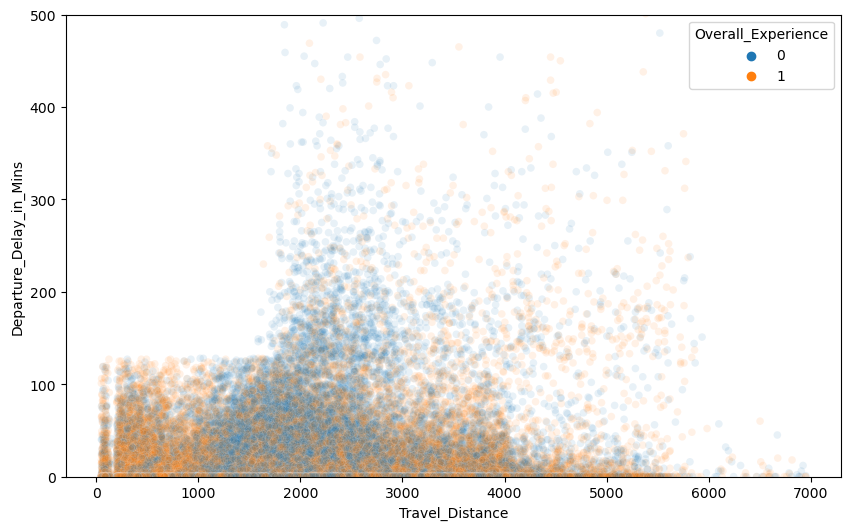

In [50]:
plt.figure(figsize=(10, 6)) 

sns.scatterplot(data = df,
                x = 'Travel_Distance', 
                y = 'Departure_Delay_in_Mins', 
                hue = 'Overall_Experience',
                alpha = 0.1,
                s=30
               )
plt.ylim(0,500)

(0.0, 500.0)

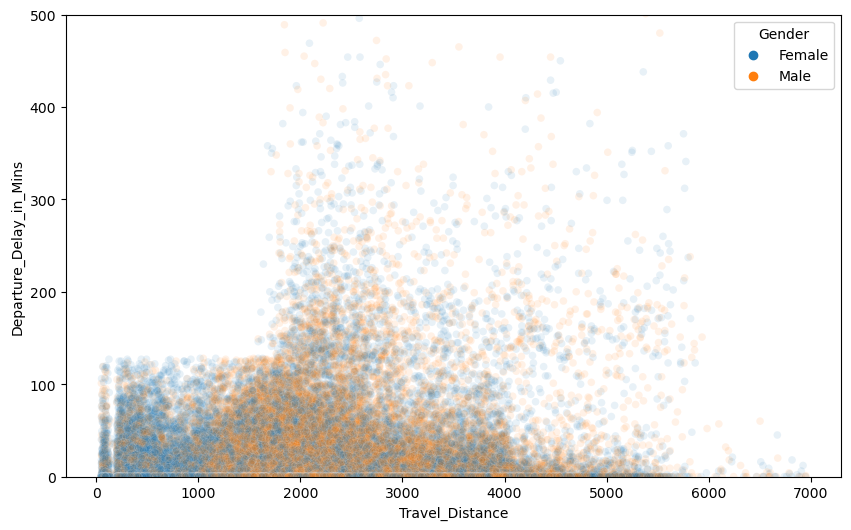

In [51]:
plt.figure(figsize=(10, 6)) 

sns.scatterplot(data = df,
                x = 'Travel_Distance', 
                y = 'Departure_Delay_in_Mins', 
                hue = 'Gender',
                alpha = 0.1,
                s=30
               )
plt.ylim(0,500)

(0.0, 500.0)

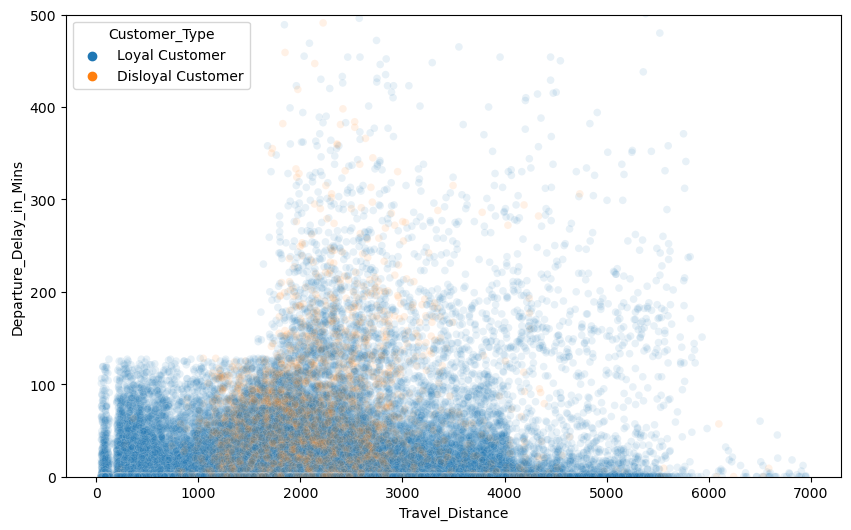

In [52]:
plt.figure(figsize=(10, 6)) 

sns.scatterplot(data = df,
                x = 'Travel_Distance', 
                y = 'Departure_Delay_in_Mins', 
                hue = 'Customer_Type',
                alpha = 0.1,
                s=30
               )
plt.ylim(0,500)

(0.0, 500.0)

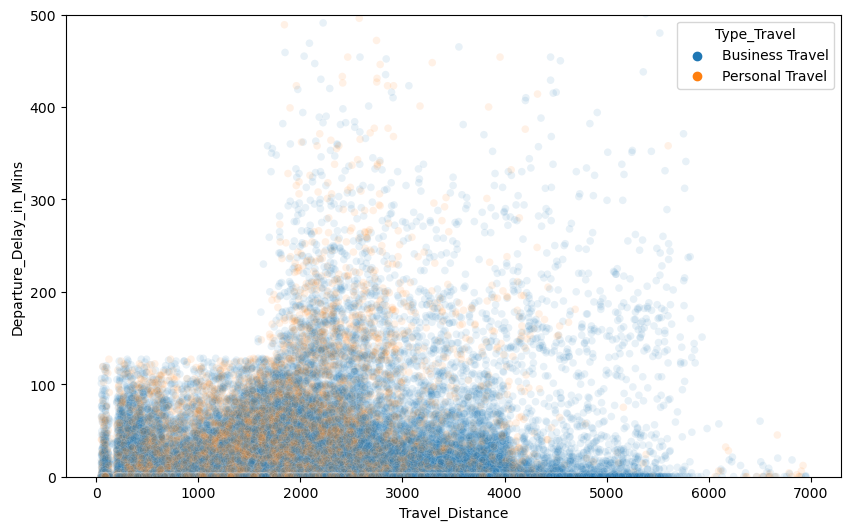

In [53]:
plt.figure(figsize=(10, 6)) 

sns.scatterplot(data = df,
                x = 'Travel_Distance', 
                y = 'Departure_Delay_in_Mins', 
                hue = 'Type_Travel',
                alpha = 0.1,
                s=30
               )
plt.ylim(0,500)

(0.0, 500.0)

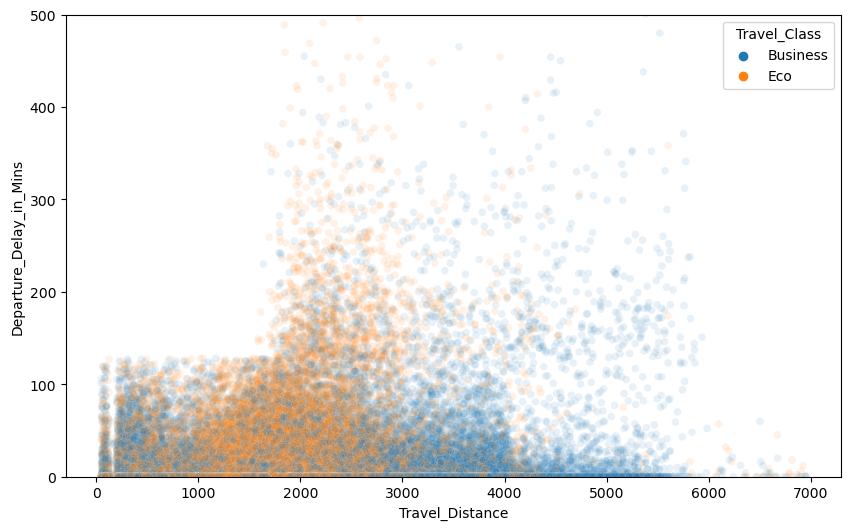

In [54]:
plt.figure(figsize=(10, 6)) 

sns.scatterplot(data = df,
                x = 'Travel_Distance', 
                y = 'Departure_Delay_in_Mins', 
                hue = 'Travel_Class',
                alpha = 0.1,
                s=30
               )
plt.ylim(0,500)

(0.0, 500.0)

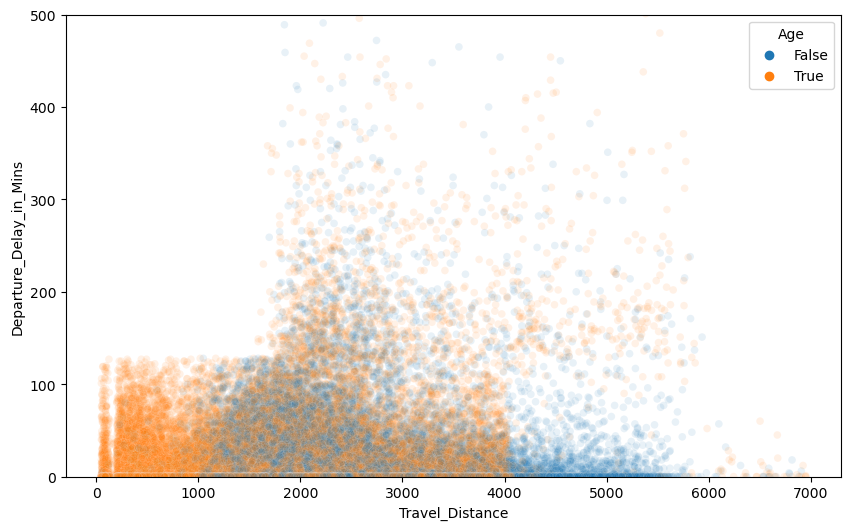

In [55]:
plt.figure(figsize=(10, 6)) 

sns.scatterplot(data = df,
                x = 'Travel_Distance', 
                y = 'Departure_Delay_in_Mins', 
                hue = df['Age']>33,
                alpha = 0.1,
                s=30
               )
plt.ylim(0,500)

(0.0, 500.0)

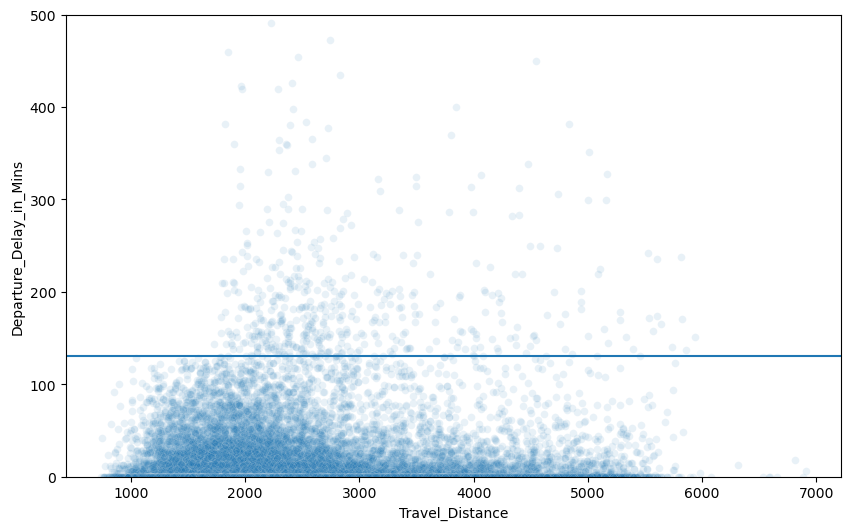

In [56]:
plt.figure(figsize=(10, 6)) 

sns.scatterplot(data = df,
                x = df['Travel_Distance'][(df['Age']>18) & (df['Age']<33)], 
                y = df['Departure_Delay_in_Mins'][(df['Age']>18) & (df['Age']<33)], 
                #hue = (df['Age']>18) & (df['Age']<33),
                alpha = 0.1,
                s=30
               )
plt.axhline(130)
plt.ylim(0,500)

### Travel Distance 

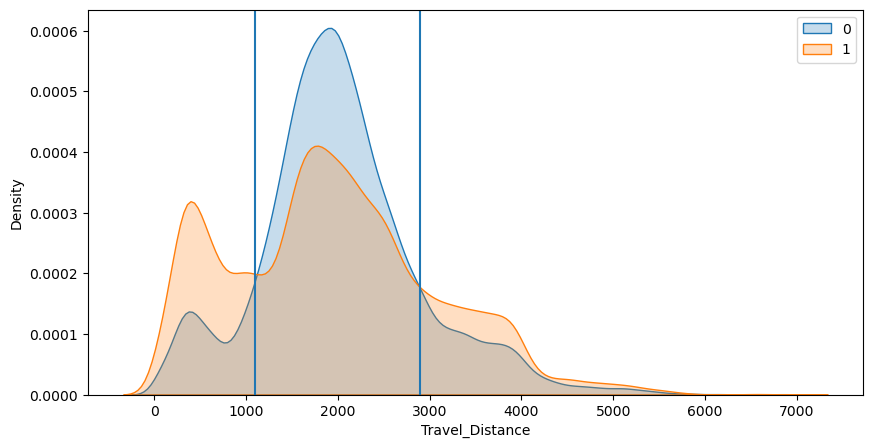

In [57]:
Travel_Distance_0 = df['Travel_Distance'][df['Overall_Experience']==0] 
Travel_Distance_1 = df['Travel_Distance'][df['Overall_Experience']==1] 

plt.figure(figsize=(10, 5)) 
ax1 = sns.kdeplot(Travel_Distance_0, label='0', fill = True)  
ax2 = sns.kdeplot(Travel_Distance_1, label='1', fill = True, ax=ax1)  
plt.axvline(1100)
plt.axvline(2900)

ax1.legend()  
ax2.legend()

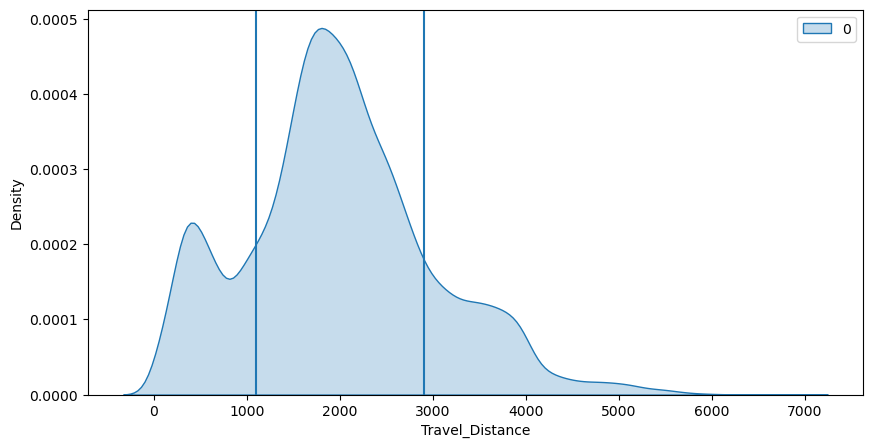

In [58]:
Travel_Distance_0 = df_submit['Travel_Distance']

plt.figure(figsize=(10, 5)) 
ax1 = sns.kdeplot(Travel_Distance_0, label='0', fill = True)  
plt.axvline(1100)
plt.axvline(2900)

ax1.legend()  
ax2.legend()

### Age vs Distance

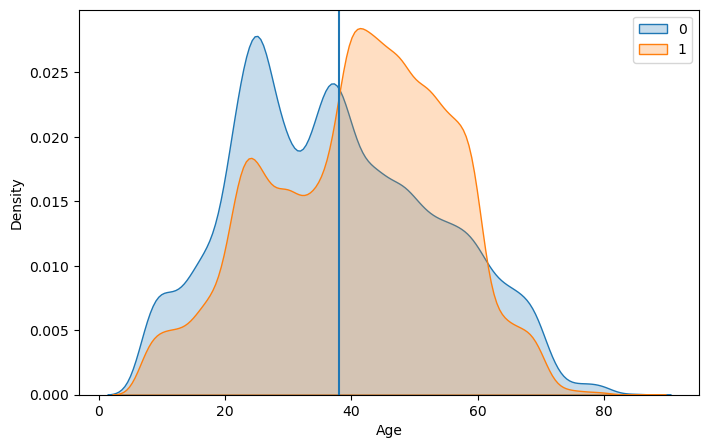

In [59]:
type_0 = df['Age'][df['Overall_Experience']==0] 
type_1 = df['Age'][df['Overall_Experience']==1]

plt.figure(figsize=(8, 5)) 
ax1 = sns.kdeplot(type_0, label='0', fill = True)  
ax2 = sns.kdeplot(type_1, label='1', fill = True, ax=ax1)  
plt.axvline(38)

ax1.legend()  
ax2.legend()

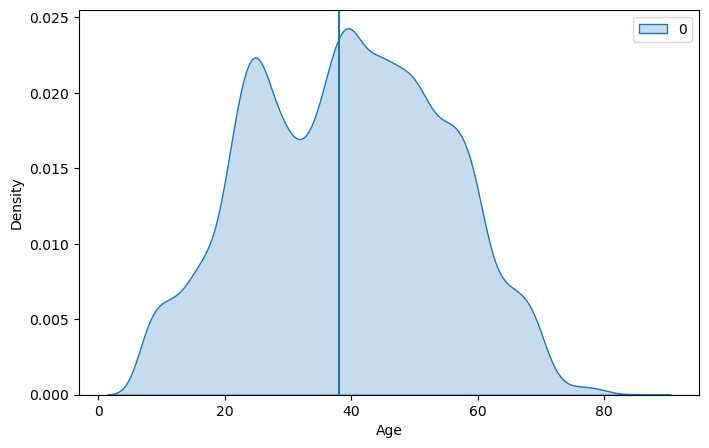

In [60]:
type_0 = df_submit['Age']

plt.figure(figsize=(8, 5)) 
ax1 = sns.kdeplot(type_0, label='0', fill = True)  
plt.axvline(38)

ax1.legend()  
ax2.legend()

<AxesSubplot: xlabel='Age', ylabel='Travel_Distance'>

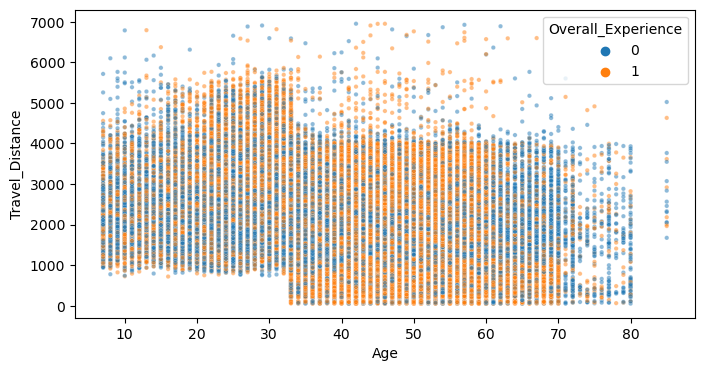

In [61]:
plt.figure(figsize=(8, 4)) 

sns.scatterplot(data = df,
                y='Travel_Distance', 
                x = 'Age', 
                hue = 'Overall_Experience',
                alpha = 0.5,
                s=10
               )

<AxesSubplot: xlabel='Age', ylabel='Travel_Distance'>

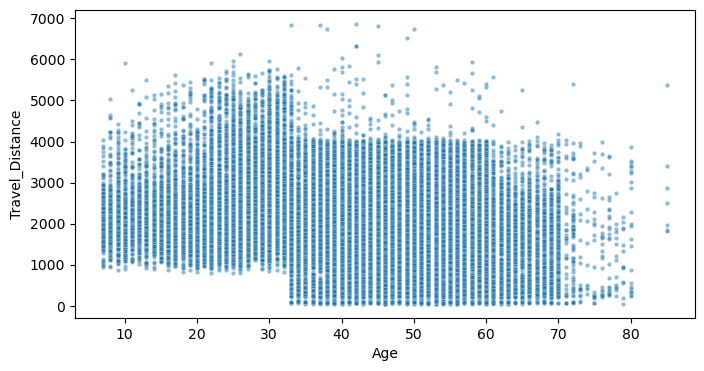

In [62]:
plt.figure(figsize=(8, 4)) 

sns.scatterplot(data = df_submit,
                y='Travel_Distance', 
                x = 'Age', 
                alpha = 0.5,
                s=10
               )

<AxesSubplot: xlabel='Travel_Distance', ylabel='Age'>

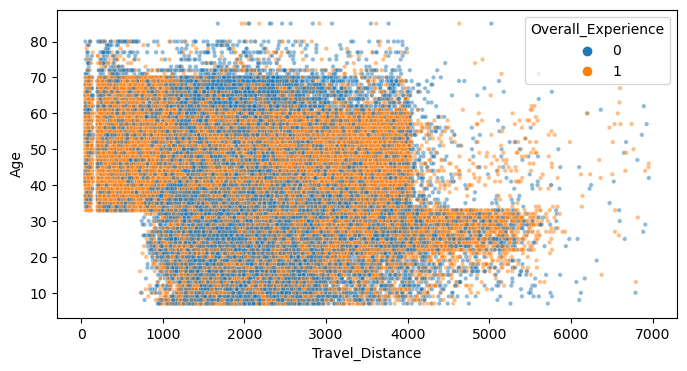

In [63]:
plt.figure(figsize=(8, 4)) 

sns.scatterplot(data = df,
                x='Travel_Distance', 
                y = 'Age', 
                hue = 'Overall_Experience',
                alpha = 0.5,
                s=10
               )

<AxesSubplot: xlabel='Travel_Distance', ylabel='Age'>

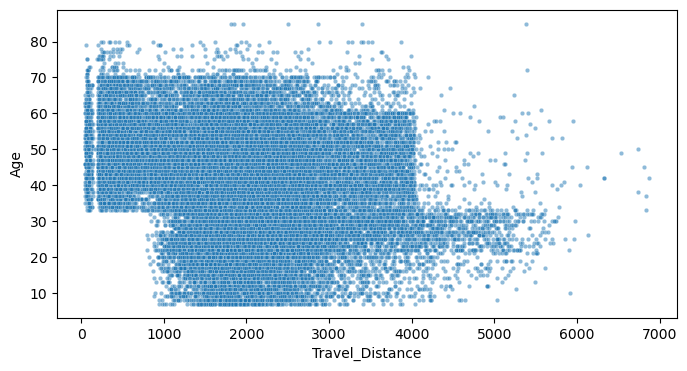

In [64]:
plt.figure(figsize=(8, 4)) 

sns.scatterplot(data = df_submit,
                x='Travel_Distance', 
                y = 'Age', 
                alpha = 0.5,
                s=10
               )

In [65]:
df_copy = df.copy()

<AxesSubplot: xlabel='Travel_Distance', ylabel='Age'>

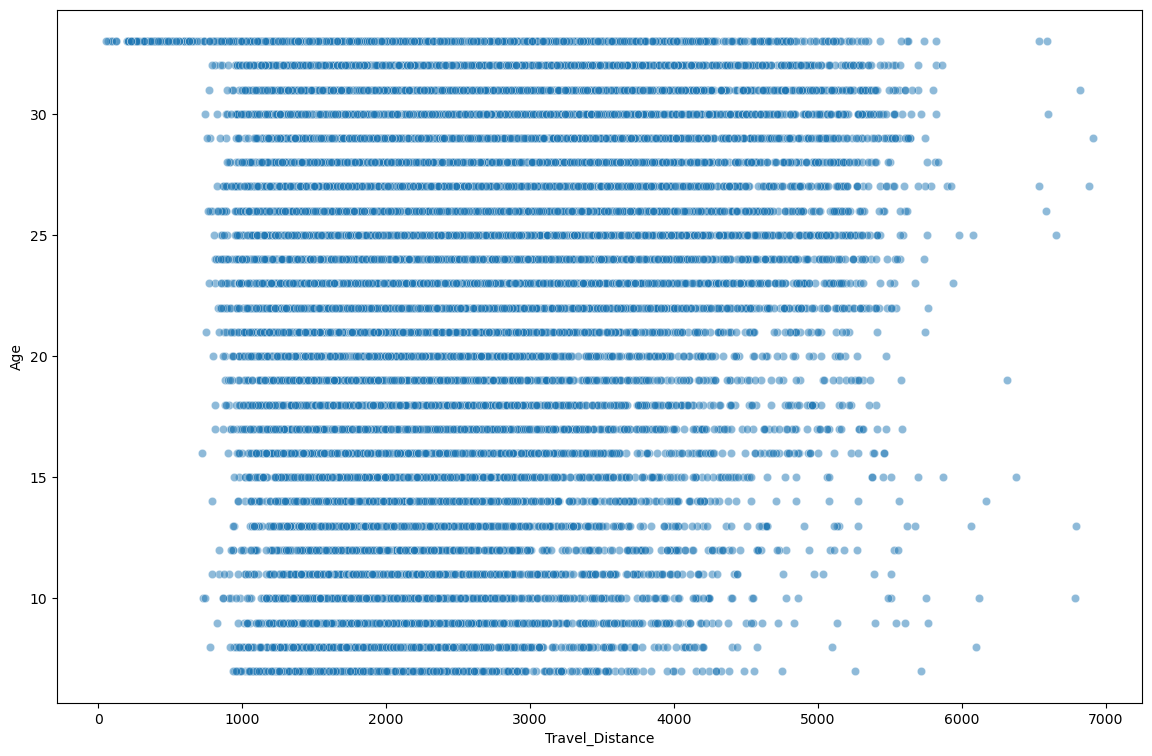

In [66]:
plt.figure(figsize=(14, 9)) 

sns.scatterplot(
                x= df_copy['Travel_Distance'][df_copy['Age']<34],
                y = df_copy['Age'][df_copy['Age']<34], 
                #hue = df_copy['Overall_Experience'][df_copy['Age']<33],
                alpha = 0.5,
                #s=10
               )

In [67]:
df_copy['Travel_Distance'][df_copy['Age']<33].min()

720

In [68]:
df_copy['Travel_Distance'].min()

50

(33.0, 88.9)

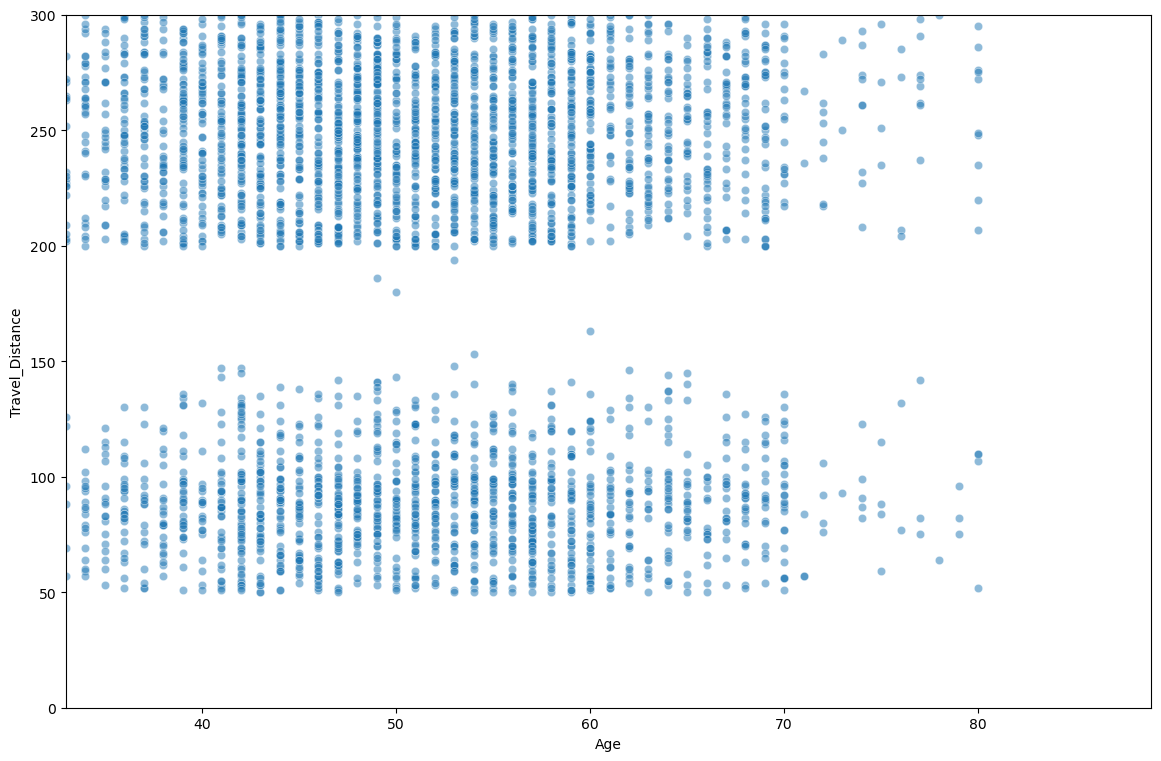

In [69]:
plt.figure(figsize=(14, 9)) 

sns.scatterplot(data = df,
                y='Travel_Distance', 
                x = 'Age', 
                #hue = 'Overall_Experience',
                alpha = 0.5,
                #s=10
               )
plt.ylim(0,300)
plt.xlim(33,)

<AxesSubplot: ylabel='Frequency'>

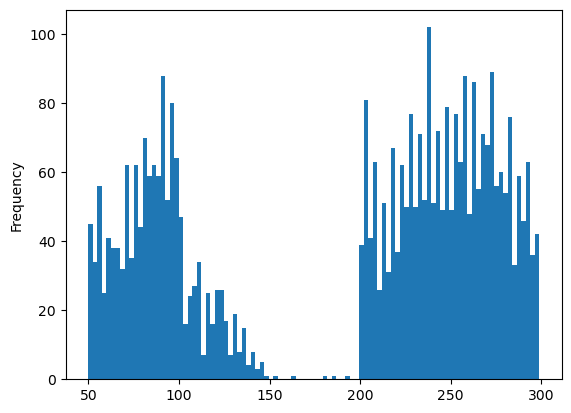

In [70]:
df['Travel_Distance'][df['Travel_Distance']<300].plot(kind='hist', bins=100)

In [71]:
#df_copy['Travel_Distance'][df_copy['Age']<33] = df_copy['Travel_Distance'][df_copy['Age']<33]-700

<AxesSubplot: xlabel='Travel_Distance', ylabel='Age'>

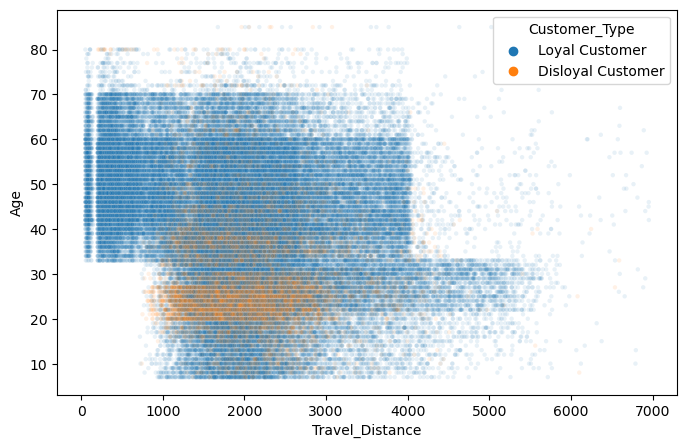

In [72]:
plt.figure(figsize=(8, 5)) 

sns.scatterplot(
                x= df_copy['Travel_Distance'],
                y = df_copy['Age'], 
                hue = df_copy['Customer_Type'],
                alpha = 0.1,
                s=10
               )

In [73]:
(df['Age']<=18).value_counts()

False    86350
True      8029
Name: Age, dtype: int64

<AxesSubplot: xlabel='Travel_Distance', ylabel='Age'>

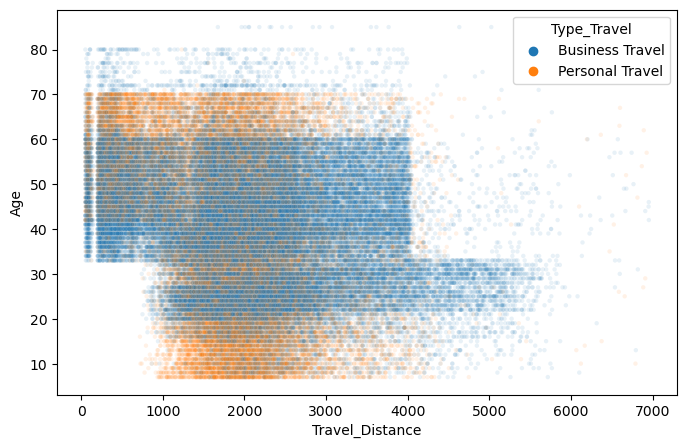

In [74]:
plt.figure(figsize=(8, 5)) 

sns.scatterplot(
                x= df_copy['Travel_Distance'],
                y = df_copy['Age'], 
                hue = df_copy['Type_Travel'],
                alpha = 0.1,
                s=10
               )

<AxesSubplot: xlabel='Travel_Distance', ylabel='Age'>

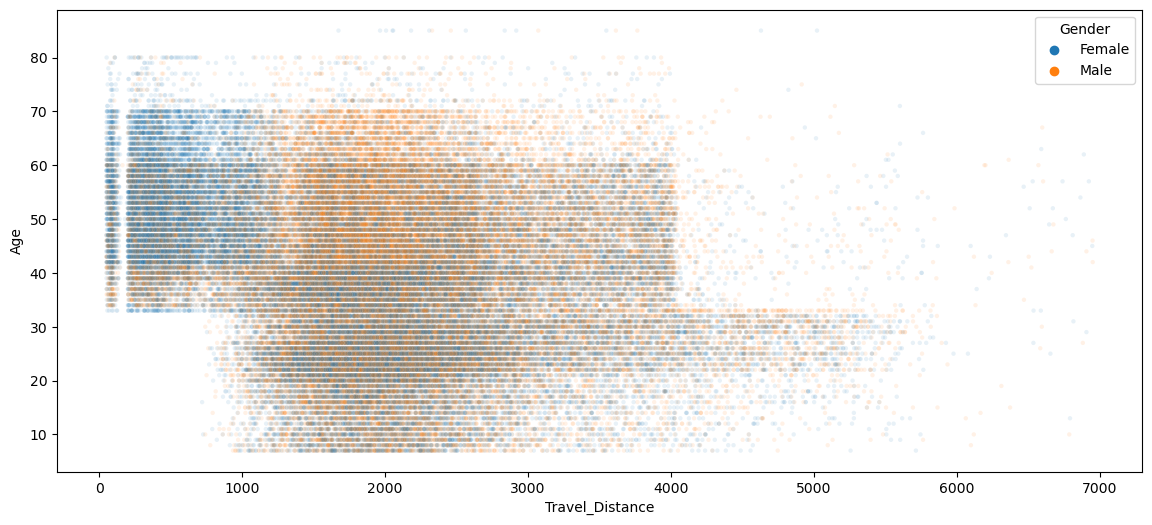

In [75]:
plt.figure(figsize=(14, 6)) 

sns.scatterplot(
                x= df_copy['Travel_Distance'],
                y = df_copy['Age'], 
                hue = df_copy['Gender'],
                alpha = 0.1,
                s=10
               )

<AxesSubplot: xlabel='Travel_Distance', ylabel='Age'>

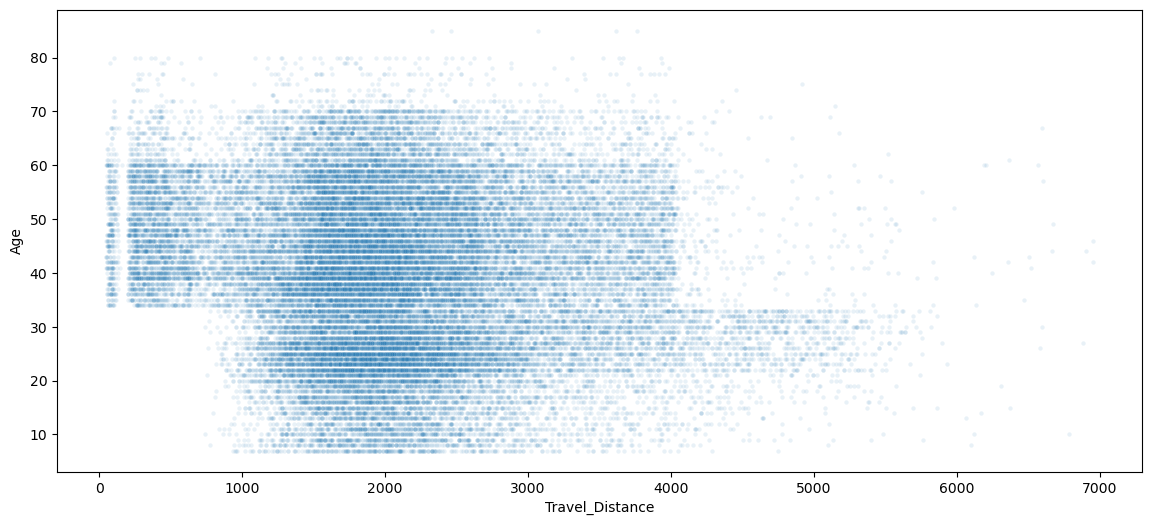

In [76]:
plt.figure(figsize=(14, 6)) 

sns.scatterplot(
                x= df_copy['Travel_Distance'][df_copy['Gender']=='Male'],
                y = df_copy['Age'][df_copy['Gender']=='Male'], 
                #hue = df_copy['Gender'],
                alpha = 0.1,
                s=10
               )

<AxesSubplot: xlabel='Travel_Distance', ylabel='Age'>

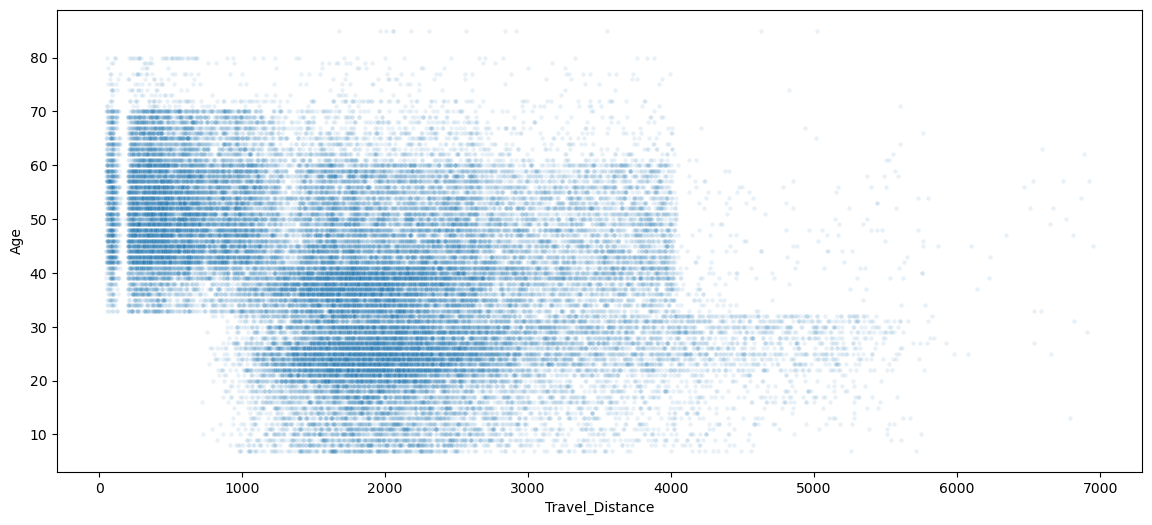

In [77]:
plt.figure(figsize=(14, 6)) 

sns.scatterplot(
                x= df_copy['Travel_Distance'][df_copy['Gender']=='Female'],
                y = df_copy['Age'][df_copy['Gender']=='Female'], 
                #hue = df_copy['Gender'],
                alpha = 0.1,
                s=10
               )

<AxesSubplot: xlabel='Travel_Distance', ylabel='Age'>

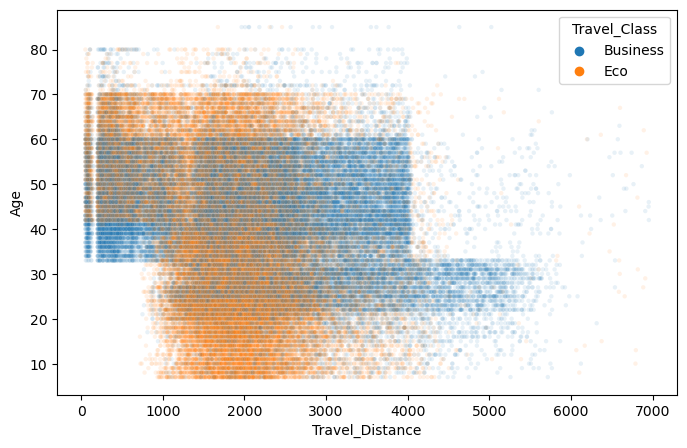

In [78]:
plt.figure(figsize=(8, 5)) 

sns.scatterplot(
                x= df_copy['Travel_Distance'],
                y = df_copy['Age'], 
                hue = df_copy['Travel_Class'],
                alpha = 0.1,
                s=10
               )

Who are those between age 20-32 that travel more than 4000?

In [79]:
df_copy2 = df[(df['Age']>20) & (df['Age']<33) & (df['Travel_Distance']>4000)]
df_copy2.head()

Overall_Experience       Seat_Comfort Seat_Class Arrival_Time_Convenient  \
51                    0               Poor   Ordinary          Extremely Poor   
79                    0  Needs Improvement  Green Car              Acceptable   
112                   1               Good   Ordinary                    Good   
115                   0         Acceptable  Green Car                    Poor   
119                   1  Needs Improvement   Ordinary       Needs Improvement   

              Catering  Platform_Location Onboard_Wifi_Service  \
51      Extremely Poor         Acceptable                 Poor   
79                Poor         Acceptable    Needs Improvement   
112               Good               Good                 Good   
115               Poor               Poor           Acceptable   
119  Needs Improvement  Needs Improvement            Excellent   

    Onboard_Entertainment     Online_Support Ease_of_Online_Booking  \
51         Extremely Poor               Poor                   Poor   
79      Needs Improvement  Needs Improvement      Needs Improvement   
112                  Good               Good                   Good   
115            Acceptable         Acceptable             Acceptable   
119             Excellent          Excellent              Excellent   

       Onboard_Service            Legroom   Baggage_Handling CheckIn_Service  \
51                Good               Poor               Good      Acceptable   
79                Poor  Needs Improvement  Needs Improvement      Acceptable   
112         Acceptable  Needs Improvement               Good            Poor   
115  Needs Improvement  Needs Improvement               Good            Poor   
119  Needs Improvement  Needs Improvement          Excellent       Excellent   

           Cleanliness    Online_Boarding  Gender   Customer_Type   Age  \
51                Good               Poor  Female  Loyal Customer  26.0   
79   Needs Improvement  Needs Improvement    Male  Loyal Customer  25.0   
112          Excellent               Good    Male  Loyal Customer  26.0   
115               Good         Acceptable    Male  Loyal Customer  22.0   
119               Good          Excellent  Female  Loyal Customer  29.0   

         Type_Travel Travel_Class  Travel_Distance  Departure_Delay_in_Mins  \
51   Business Travel     Business             4560                      0.0   
79   Business Travel     Business             5406                      0.0   
112  Business Travel     Business             4615                     17.0   
115  Business Travel     Business             4733                      0.0   
119  Business Travel     Business             4199                      4.0   

     Arrival_Delay_in_Mins  
51                     7.0  
79                     0.0  
112                    6.0  
115                    2.0  
119                    0.0

In [80]:
df_copy2['Travel_Class'].value_counts()

Business    1685
Eco          126
Name: Travel_Class, dtype: int64

In [81]:
df_copy2['Customer_Type'].value_counts()

Loyal Customer       1753
Disloyal Customer      58
Name: Customer_Type, dtype: int64

In [82]:
df_copy2['Gender'].value_counts()

Female    927
Male      884
Name: Gender, dtype: int64

In [83]:
df_copy2['Type_Travel'].value_counts()

Business Travel    1742
Personal Travel      69
Name: Type_Travel, dtype: int64

In [84]:
df_copy3 = df[(df['Age']>20) & (df['Age']<33) & (df['Travel_Distance']<4000)]

In [85]:
df_copy3['Travel_Class'].value_counts()

Eco         12574
Business     7992
Name: Travel_Class, dtype: int64

In [86]:
df_copy3['Customer_Type'].value_counts()

Loyal Customer       11883
Disloyal Customer     8683
Name: Customer_Type, dtype: int64

In [87]:
df_copy3['Gender'].value_counts()

Female    10675
Male       9891
Name: Gender, dtype: int64

In [88]:
df_copy3['Type_Travel'].value_counts()

Business Travel    15163
Personal Travel     5403
Name: Type_Travel, dtype: int64

In [89]:
df_copy4 = df[(df['Age']>=33) & (df['Travel_Distance']<4000)]


In [90]:
df_copy4['Overall_Experience'].value_counts()

1    36423
0    24613
Name: Overall_Experience, dtype: int64

In [91]:
df_copy4['Travel_Class'].value_counts()

Business    32871
Eco         28165
Name: Travel_Class, dtype: int64

In [92]:
df_copy4['Customer_Type'].value_counts()

Loyal Customer       54967
Disloyal Customer     6069
Name: Customer_Type, dtype: int64

In [93]:
df_copy4['Gender'].value_counts()

Female    30880
Male      30156
Name: Gender, dtype: int64

In [94]:
df_copy4['Type_Travel'].value_counts()

Business Travel    43990
Personal Travel    17046
Name: Type_Travel, dtype: int64

In [95]:
df_copy5 = df[(df['Age']>=33) & (df['Travel_Distance']>4000)]

In [96]:
df_copy5['Travel_Class'].value_counts()

Business    585
Eco         202
Name: Travel_Class, dtype: int64

In [97]:
df_copy5['Customer_Type'].value_counts()

Loyal Customer       729
Disloyal Customer     58
Name: Customer_Type, dtype: int64

In [98]:
df_copy5['Gender'].value_counts()

Male      510
Female    277
Name: Gender, dtype: int64

In [99]:
df_copy5['Type_Travel'].value_counts()

Business Travel    641
Personal Travel    146
Name: Type_Travel, dtype: int64